In [2]:
#import pymysql
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split#,GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC  
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn import cross_validation,metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc  
'''
conn = pymysql.connect(host='192.168.1.131',user='yichen', password='0000', database='yelp_db', charset='utf8')
cur = conn.cursor()

#query="select id as user_id, review_count,yelping_since,useful,funny,cool,fans,average_stars, compliment_hot+ compliment_more+ compliment_profile+ compliment_cute+ compliment_list+ compliment_note+ compliment_plain+compliment_cool+compliment_funny+compliment_writer+compliment_photos as sum_compliment from user"
query='select id as review_id,business_id,user_id,stars,date,useful,funny,cool from review'
cur.execute(query)
#cur.execute('commit')
t=cur.fetchall()
#user_info_50000=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
review_info_notext=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
print('done')
review_info_notext.to_csv('E:/DATA/DATA in CU Boulder/CSCI 5622/review_info_notext.csv')
'''

E:\Tools\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Tools\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


'\nconn = pymysql.connect(host=\'192.168.1.131\',user=\'yichen\', password=\'0000\', database=\'yelp_db\', charset=\'utf8\')\ncur = conn.cursor()\n\n#query="select id as user_id, review_count,yelping_since,useful,funny,cool,fans,average_stars, compliment_hot+ compliment_more+ compliment_profile+ compliment_cute+ compliment_list+ compliment_note+ compliment_plain+compliment_cool+compliment_funny+compliment_writer+compliment_photos as sum_compliment from user"\nquery=\'select id as review_id,business_id,user_id,stars,date,useful,funny,cool from review\'\ncur.execute(query)\n#cur.execute(\'commit\')\nt=cur.fetchall()\n#user_info_50000=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])\nreview_info_notext=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])\nprint(\'done\')\nreview_info_notext.to_csv(\'E:/DATA/DATA in CU Boulder/CSCI 5622/review_info_notext.csv\')\n'

In [44]:
#query2='select review.id as review_id, business_id,user_id,stars, review.useful as review_useful,review.funny as review_funny, review.cool as review_cool, user_info_50000.review_count as user_review_count, user_info_50000.useful as user_useful,user_info_50000.fun as user_fun,user_info_50000.cool as user_cool,user_info_50000.fans as user_fans,user_info_50000.averagestars as user_averagestars,user_info_50000.sum_compliment as user_sum_compliment from review inner join user_info_50000 on review.user_id=user_info_50000.id'
#user_info['avgOpinionsPerReview']=(user_info['useful']+user_info['funny']+user_info['cool'])/user_info['review_count']
#user_info_50000
query2='select id,business_id,user_id,stars,useful,funny,cool from review'
cur.execute(query2)
tt=cur.fetchall()
review_reviewer_50000=pd.DataFrame(list(tt), columns = [i[0] for i in cur.description])
print('done')

done


In [87]:
#rename column name in case mix up
user_info_50000.columns=['user_id','user_review_count','user_useful','user_funny','user_cool','user_fans','user_average_stars','user_sum_compliment']
#review=review_reviewer_50000
#review.columns = ['review_id', 'business_id','user_id','stars','review_useful''review_funny','review_cool']
#review_user_50000=pd.merge(review,user_info_50000,on='user_id',how='inner')

In [33]:
review_cat_user_50000=pd.merge(category,review_user_50000,on='business_id',how='inner')

In [95]:
user_cat_count=review_cat_user_50000.groupby(['user_id','category'], as_index=False).count()
user_cat_sum=review_cat_user_50000.groupby(['user_id','category'], as_index=False).sum()


In [99]:
user_cat_count=user_cat_count[['user_id','category','review_id']]
user_cat_count.rename(columns={'review_id':'review_count'}, inplace=True)

E:\Tools\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [112]:
user_cat_stat=pd.merge(user_cat_count,user_cat_sum,on=['user_id','category'],how='inner')

In [25]:
#review_cat_user_50000

In [10]:
#del user_cat_stat['user_review_count']
#del user_cat_stat['user_useful']
#del user_cat_stat['user_funny']
#del user_cat_stat['user_cool']
#del user_cat_stat['user_fans']
#del user_cat_stat['user_sum_compliment']
#del user_cat_stat['user_average_stars']
user_cat_stat['stars']=user_cat_stat['stars']/user_cat_stat['review_count']
user_cat_stat['review_useful']=user_cat_stat['review_useful']/user_cat_stat['review_count']
user_cat_stat['review_funny']=user_cat_stat['review_funny']/user_cat_stat['review_count']
user_cat_stat['review_cool']=user_cat_stat['review_cool']/user_cat_stat['review_count']
user_cat_stat.rename(columns={'review_count':'uc_review_count','stars':'uc_avg_stars','review_useful':'uc_avg_review_useful','review_funny':'uc_avg_review_funny','review_cool':'uc_avg_review_cool'}, inplace=True)
user_cat_stat

In [135]:
review_cat_user_userFeature_50000=pd.merge(review_cat_user_50000,user_cat_stat,on=['user_id','category'],how='inner')

In [26]:
#review_cat_user_userFeature_50000

#temp=pd.merge(user100,review_cat_user_userFea_ucFea_50000,how='inner',on='user_id')
#review_cat_user_userFea_ucFea_50000


In [10]:
#review_cat_user_50000.loc[(review_cat_user_50000['user_id']=='---1lKK3aKOuomHnwAkAow') & (review_cat_user_50000['category']=='Accessories')]

In [2]:
#review_cat_user_userFea_business_50000=pd.read_csv('user_userFea_business_50000.csv')
#del review_cat_user_userFea_business_50000['Unnamed: 0']
#review_cat_user_userFea_business_50000


**Classification**

In [2]:
all_features_noTFIDFBoG=pd.read_csv('all_features_noTFIDFBoG.csv',encoding='gb18030')
#all_features_noUC_TFIDFBoG=pd.read_csv('all_features_noUC_TFIDFBoG.csv',encoding='gb18030')
#del all_features_noTFIDFBoG['Unnamed: 0']
#del all_features_noUC_TFIDFBoG['Unnamed: 0']
all_features_noTFIDFBoG['user_useful']=all_features_noTFIDFBoG['user_useful']-all_features_noTFIDFBoG['review_useful']
all_features_noTFIDFBoG['user_funny']=all_features_noTFIDFBoG['user_funny']-all_features_noTFIDFBoG['review_funny']
all_features_noTFIDFBoG['user_cool']=all_features_noTFIDFBoG['user_cool']-all_features_noTFIDFBoG['review_cool']

In [3]:
all_features_noUC_TFIDFBoG=pd.read_csv('all_features_noUC_TFIDFBoG.csv',encoding='gb18030')
#del all_features_noUC_TFIDFBoG.csv['Unnamed: 0']
#del all_features_noUC_TFIDFBoG.csv['Unnamed: 0']
all_features_noUC_TFIDFBoG['user_useful']=all_features_noUC_TFIDFBoG['user_useful']-all_features_noUC_TFIDFBoG['review_useful']
all_features_noUC_TFIDFBoG['user_funny']=all_features_noUC_TFIDFBoG['user_funny']-all_features_noUC_TFIDFBoG['review_funny']
all_features_noUC_TFIDFBoG['user_cool']=all_features_noUC_TFIDFBoG['user_cool']-all_features_noUC_TFIDFBoG['review_cool']

In [7]:
train, test = train_test_split(all_features_noUC_TFIDFBoG, test_size=0.2)
train_rev_lst = [[] for _ in range(len(train))]
train_lab_lst = []
   
test_rev_lst = [[] for _ in range(len(test))]
test_lab_lst = []

print('start')
#user_review_count	user_useful	user_funny	user_cool	user_fans	user_average_stars	user_sum_compliment	uc_review_count	uc_avg_stars
#uc_avg_review_useful	uc_avg_review_funny	uc_avg_review_coo
ini = 0
for index, row in train.iterrows():
    #print(ini, len(train), ini/len(train))
    train_rev_lst[ini].extend((row['user_review_count'],row['user_useful'],row['user_funny'],row['user_cool'],row['user_fans'],
                              row['user_average_stars'],row['user_sum_compliment']))
    #train_rev_lst[ini].extend((row['review_useful'],row['review_funny'],row['review_cool'],row['user_review_count'],
    #                           row['user_useful'],row['user_funny'],row['user_cool'],row['user_fans'],
    #                           row['user_average_stars'],row['user_sum_compliment'],row['uc_review_count'],row['uc_avg_stars'],
    #                           row['uc_avg_review_useful'],row['uc_avg_review_funny'],row['uc_avg_review_cool'],
    #                           row['reviews_polarity'],row['reviews_subjectivity'],row['business_stars']))

    if row['review_stars'] == 5:
        train_lab_lst.append(5)
    elif row['review_stars'] == 4:
        train_lab_lst.append(4)
    elif row['review_stars'] == 3:
        train_lab_lst.append(3)
    elif row['review_stars'] == 2:
        train_lab_lst.append(2)
    else:
        train_lab_lst.append(1)
    
    ini += 1 

print('training features completed')

ini = 0
for index, row in test.iterrows():
    #print(ini, len(test), ini/len(test))
    test_rev_lst[ini].extend((row['user_review_count'],row['user_useful'],row['user_funny'],row['user_cool'],row['user_fans'],
                              row['user_average_stars'],row['user_sum_compliment']))
    #test_rev_lst[ini].extend((row['review_useful'],row['review_funny'],row['review_cool'],row['user_review_count'],
    #                          row['user_useful'],row['user_funny'],row['user_cool'],row['user_fans'],
    #                          row['user_average_stars'],row['user_sum_compliment'],row['uc_review_count'],row['uc_avg_stars'],
    #                          row['uc_avg_review_useful'],row['uc_avg_review_funny'],row['uc_avg_review_cool'],
    #                          row['reviews_polarity'],row['reviews_subjectivity'],row['business_stars']))
    #test_rev_lst[ini].extend((row['user_review_count'],row['user_useful'],
    #               row['user_funny'],row['user_cool'],row['user_fans'],
    #               row['user_average_stars'],row['user_sum_compliment']))

    if row['review_stars'] == 5:
        test_lab_lst.append(5)
    elif row['review_stars'] == 4:
        test_lab_lst.append(4)
    elif row['review_stars'] == 3:
        test_lab_lst.append(3)
    elif row['review_stars'] == 2:
        test_lab_lst.append(2)
    else:
        test_lab_lst.append(1)
    
    ini += 1 
print('testing features completed') 

start
training features completed
testing features completed


In [8]:
### scale the data first
scaler = preprocessing.StandardScaler().fit(train_rev_lst)
train_rev_lst=scaler.transform(train_rev_lst)
test_rev_lst=scaler.transform(test_rev_lst)

In [14]:
len(test_lab_lst)

175923

In [35]:
train_userfea=train_rev_lst
test_userfea=test_rev_lst
train_lab_userfea=train_lab_lst
test_lab_userfea=test_lab_lst

In [19]:
#grid search for LR
param_test_LR = {'C':[1e-5,1e-4,0.001,0.01,0.1,10.0,100.0,1000.0,10000.0]}
gsearchLR = GridSearchCV(estimator = linear_model.LogisticRegression(class_weight='balanced'),param_grid = param_test_LR, scoring='accuracy',cv=5)
gsearchLR.fit(train_rev_lst, train_lab_lst)
print(gsearchLR.grid_scores_,gsearchLR.best_params_, gsearchLR.best_score_)

[mean: 0.57488, std: 0.00066, params: {'C': 1e-05}, mean: 0.59146, std: 0.00090, params: {'C': 0.0001}, mean: 0.60144, std: 0.00078, params: {'C': 0.001}, mean: 0.60462, std: 0.00083, params: {'C': 0.01}, mean: 0.60502, std: 0.00089, params: {'C': 0.1}, mean: 0.60508, std: 0.00089, params: {'C': 10.0}, mean: 0.60508, std: 0.00089, params: {'C': 100.0}, mean: 0.60508, std: 0.00089, params: {'C': 1000.0}, mean: 0.60508, std: 0.00089, params: {'C': 10000.0}] {'C': 100.0} 0.6050820818317209


In [20]:
len(review_cat_user_userFea_business_50000)

201273

In [11]:
logreg = linear_model.LogisticRegression(C=100.0,class_weight='balanced')
logreg.fit(train_rev_lst, train_lab_lst)

pred_logreg = logreg.predict(test_rev_lst)
#acc_logreg = logreg.score(test_rev_lst,test_lab_lst)
pred_proba_logreg=logreg.predict_proba(test_rev_lst)
print('ACC:',precision_score(test_lab_lst,pred_logreg,average='micro'))  

#print('AUC:',metrics.roc_auc_score(test_lab_lst,pred_proba_logreg[:,1]))#验证集上的auc值
#print('F1:',metrics.f1_score(test_lab_lst,pred_logreg))
#print('Recall:',metrics.recall_score(test_lab_lst,pred_logreg))
#print('the auc of logistic regression is %f' %test_auc)
print(metrics.confusion_matrix(pred_logreg,test_lab_lst))#验证集上的混淆矩阵
print('RMSE:',math.sqrt(metrics.mean_squared_error(test_lab_lst,pred_logreg)))

ACC: 0.475742143833
[[ 3735  1491  1175  1490  2536]
 [   32    33    42    56    53]
 [  118   260   624   772   327]
 [  234   423  1015  1776  1267]
 [ 1443  1212  1972  5186 12983]]
RMSE: 1.7042109215804633


In [12]:
clf = SVC(C= 0.5, gamma=0.8, kernel = 'rbf', decision_function_shape = 'ovr', probability = True)
clf.fit(train_rev_lst[0:10000], train_lab_lst[0:10000]) 
pred_SVM = clf.predict(test_rev_lst[0:2500])
pred_proba_SVM = clf.predict_proba(test_rev_lst[0:2500])
print('ACC:' ,precision_score(test_lab_lst[0:2500],pred_SVM,average='micro'))  

#print('AUC:',metrics.roc_auc_score(test_lab_lst[0:2500],pred_proba_SVM[0:2500,1]))#验证集上的auc值
#print('F1:',metrics.f1_score(test_lab_lst[0:2500],pred_SVM))
#print('Recall:',metrics.recall_score(test_lab_lst[0:2500],pred_SVM))
print(metrics.confusion_matrix(test_lab_lst[0:2500],pred_SVM))#验证集上的混淆矩阵
print('RMSE:',math.sqrt(metrics.mean_squared_error(test_lab_lst[0:2500],pred_SVM)))

ACC: 0.4952
[[151   0   1  36 151]
 [ 44   0   2  51 119]
 [ 19   0  11 119 152]
 [ 30   0   5 180 376]
 [ 42   0   2 113 896]]
RMSE: 1.5889619252832963


In [ ]:
clf.get_params().keys()

In [ ]:
clf = OneVsRestClassifier(SVC(kernel = 'rbf', decision_function_shape = 'ovr', class_weight = 'balanced', probability = True))
y = label_binarize(train_lab_lst, classes=[1, 2, 3])

param_test1 = { 'estimator__C':[0.001,0.01,0.1,0.3,0.5,0.8,1.0,2.0,10.0], 'estimator__gamma':[0.1,0.3,0.5,0.8,1.0,2.0,3.0,4.0,5.0,7.0,8.0,9.0,10.0]}
gsearch1 = GridSearchCV(clf,param_grid = param_test1, scoring='roc_auc',cv=5)
print('find C and gamma')
gsearch1.fit(train_rev_lst, train_lab_lst)
print(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

find C and gamma


In [7]:
#review_userFea50000=review_cat_user_userFea_ucFea_50000[['business_id','review_id','user_id','review_stars','review_useful','review_funny','review_cool','user_review_count','user_useful','user_funny','user_cool','user_fans','user_average_stars','user_sum_compliment']]
#review_userFea50000=review_userFea50000.drop_duplicates()
#review_userFea50000

In [10]:

#find max_depth
print('find max_depth')
param_testRF2 = { 'max_depth':[12,14,16,18,20,22,24,26], 'min_samples_split':[2,4,6,8,10,12,20,30]}
gsearchRF2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 70,
                max_features='sqrt' ,random_state=10,class_weight = 'balanced',min_samples_leaf=20),  
               param_grid = param_testRF2, scoring='accuracy',cv=5)
gsearchRF2.fit(train_rev_lst, train_lab_lst)
print(gsearchRF2.grid_scores_, gsearchRF2.best_params_, gsearchRF2.best_score_)


find max_depth
[mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 2}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 4}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 6}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 8}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 10}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 12}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 20}, mean: 0.63875, std: 0.00479, params: {'max_depth': 12, 'min_samples_split': 30}, mean: 0.64323, std: 0.00371, params: {'max_depth': 14, 'min_samples_split': 2}, mean: 0.64323, std: 0.00371, params: {'max_depth': 14, 'min_samples_split': 4}, mean: 0.64323, std: 0.00371, params: {'max_depth': 14, 'min_samples_split': 6}, mean: 0.64323, std: 0.00371, params: {'max_depth': 14, 'min_samples_split': 8}, mean: 0.64323, std: 

In [8]:
#grid search for RF
#y = label_binarize(y, classes=[0, 1, 2, 3])
print('find min_samples_leaf')
param_testRF3 = { 'min_samples_leaf':[10,20,30,40,50,100]}
gsearchRF3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 70,
                max_features='sqrt' ,random_state=10,class_weight = 'balanced',max_depth =22,min_samples_split=30), 
                param_grid = param_testRF3, scoring='accuracy',cv=5)
gsearchRF3.fit(train_rev_lst, train_lab_lst)
print(gsearchRF3.grid_scores_, gsearchRF3.best_params_, gsearchRF3.best_score_)

find min_samples_leaf
[mean: 0.64941, std: 0.00185, params: {'min_samples_leaf': 10}, mean: 0.64629, std: 0.00126, params: {'min_samples_leaf': 20}, mean: 0.64274, std: 0.00218, params: {'min_samples_leaf': 30}, mean: 0.63960, std: 0.00166, params: {'min_samples_leaf': 40}, mean: 0.63728, std: 0.00262, params: {'min_samples_leaf': 50}, mean: 0.63184, std: 0.00171, params: {'min_samples_leaf': 100}] {'min_samples_leaf': 10} 0.6494056565104522


In [14]:
#Random Forest

print('Start RF')
model_RF = RandomForestClassifier(n_estimators=100, min_samples_split=30, min_samples_leaf=100,max_depth=12,max_features='sqrt',
                                  random_state=10)
model_RF.fit(train_rev_lst,train_lab_lst)
#pre_RF = model_RF.predict_proba(x_test_RF)
#fpr, tpr, thresholds = roc_curve(y_test_RF, pre_RF[:,1])  
#roc_auc = auc(fpr, tpr)  
pred_RF=model_RF.predict(test_rev_lst)
t=precision_score(test_lab_lst,pred_RF,average='micro')
pred_proba_RF=model_RF.predict_proba(test_rev_lst)
print('ACC:',t)

##print('AUC:',metrics.roc_auc_score(test_lab_lst,pred_proba_RF[:,1]))#验证集上的auc值
#print('F1:',metrics.f1_score(test_lab_lst,pred_RF))
#print('Recall:',metrics.recall_score(test_lab_lst,pred_RF))

print(metrics.confusion_matrix(test_lab_lst,pred_RF))
print('RMSE:',np.sqrt(metrics.mean_squared_error(test_lab_lst,pred_RF)))

Start RF
ACC: 0.521897900882
[[ 2781     1    37   573  2170]
 [  677    74    68   993  1607]
 [  330     2   238  2279  1979]
 [  338     2   128  3902  4910]
 [  780     5    44  2323 14014]]
RMSE: 1.52676611856


In [24]:
'''
print('Start RF')
model_RF = RandomForestClassifier(n_estimators=70, min_samples_split=10, min_samples_leaf=10,max_depth=22,max_features='sqrt',random_state=10,class_weight = 'balanced')
x_train_RF = train_rev_lst
y_train_RF = train_lab_lst
x_test_RF = test_rev_lst
y_test_RF = test_lab_lst
model_RF.fit(x_train_RF,y_train_RF)
pre_RF = model_RF.predict_proba(x_test_RF)
'''
#fpr, tpr, thresholds = roc_curve(y_test_RF, pre_RF[:,1])  
#roc_auc = auc(fpr, tpr)  
pre_lab_RF=model_RF.predict(x_test_RF)
t=precision_score(test_lab_lst,pre_lab_RF)
print(t,roc_auc)


0.938698904253 0.96304366877


In [16]:

#AdaBoost
model_Ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=100, min_samples_split=30, min_samples_leaf=100,
                                                                        max_depth =12,max_features='sqrt' ,random_state=10,),
                               algorithm="SAMME",n_estimators=200, learning_rate=0.1)

model_Ada.fit(train_rev_lst[0:10000],train_lab_lst[0:10000])
pred_proba_Ada = model_Ada.predict_proba(test_rev_lst[0:2500])
#fpr, tpr, thresholds = roc_curve(test_lab_lst, pre_Ada[:,1])  
#roc_auc = auc(fpr, tpr)  


pred_Ada=model_Ada.predict(test_rev_lst[0:2500])
confusion = confusion_matrix(test_lab_lst[0:2500], pred_Ada)

print('ACC:' ,precision_score(test_lab_lst[0:2500],pred_Ada,average='micro'))  

#print('AUC:',metrics.roc_auc_score(test_lab_lst[0:2500],pred_proba_Ada[:,1]))
#print('F1:',metrics.f1_score(test_lab_lst[0:2500],pred_Ada))
#print('Recall:',metrics.recall_score(test_lab_lst[0:2500],pred_Ada))
#print('ACC:',precision_score(test_lab_lst[0:2500],pred_Ada,average='micro'))
print(confusion)
print('MSE:',metrics.mean_squared_error(test_lab_lst[0:2500],pred_Ada))

ACC: 0.4796


ValueError: multiclass format is not supported

In [10]:
import lightgbm as lgb
### GBM models-----------------------------------------------------------------------------------------  
lgb_train = lgb.Dataset(train_rev_lst, train_lab_lst)
lgb_eval = lgb.Dataset(test_rev_lst, test_lab_lst, reference=lgb_train)

        # specify your configurations as a dict
params = {
            'task': 'predict',
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'auc'},
            'num_leaves': 91,
            'learning_rate': 0.1,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
}

       # print('Start training...')
        # train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

        #print('Save model...')
        # save model to file
gbm.save_model('model.txt')
#gbm.fit(train_rev_lst, test_rev_lst)
pred_proba_GBM = gbm.predict(test_rev_lst)
#pred_proba_GBM = gbm.predict_proba(test_rev_lst)
#fpr, tpr, thresholds = roc_curve(test_lab_lst, pre_GBM)  
#roc_auc = auc(fpr, tpr)  
#print(roc_auc)
ii=0
pred_GBM=[]
for i in pred_proba_GBM:
    if(i>0.6):
        pred_GBM.append(1)
    else:
        pred_GBM.append(0)
print('ACC:',precision_score(test_lab_lst,pred_GBM))
fpr, tpr, thresholds = roc_curve(test_lab_lst, pred_proba_GBM) 
roc_auc = auc(fpr, tpr)
confusion_GBM = confusion_matrix(test_lab_lst, pred_GBM)
print('AUC:',roc_auc)
print('AUC:',metrics.roc_auc_score(test_lab_lst,pred_proba_GBM))#验证集上的auc值
print('F1:',metrics.f1_score(test_lab_lst,pred_GBM))
print('Recall:',metrics.recall_score(test_lab_lst,pred_GBM))

#print(precision_score(test_lab_lst,predictions_NN,average=None),model_NN.score(test_rev_lst,test_lab_lst))
print(confusion_GBM)
print('RMSE:',math.sqrt(metrics.mean_squared_error(test_lab_lst,pred_GBM)))

[1]	valid_0's auc: 0.768238	valid_0's l2: 0.217317
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.768999	valid_0's l2: 0.209786
[3]	valid_0's auc: 0.769153	valid_0's l2: 0.203749
[4]	valid_0's auc: 0.769059	valid_0's l2: 0.198875
[5]	valid_0's auc: 0.768795	valid_0's l2: 0.194942
[6]	valid_0's auc: 0.769067	valid_0's l2: 0.191639
[7]	valid_0's auc: 0.769104	valid_0's l2: 0.191384
[8]	valid_0's auc: 0.769014	valid_0's l2: 0.188833
Early stopping, best iteration is:
[3]	valid_0's auc: 0.769153	valid_0's l2: 0.203749
ACC: 0.714937449788
AUC: 0.769153325276
AUC: 0.769153325276
F1: 0.815173474228
Recall: 0.94809938739
[[ 4039  9935]
 [ 1364 24917]]
RMSE: 0.5297977247161371


In [ ]:
print(1)

In [23]:
#find alpha for NN
print('find alpha')
param_testNN1 = { 'alpha':[1e-5,1e-4,0.001,0.01,0.1,10.0,100.0,1000.0]}
gsearchNN1 = GridSearchCV(estimator = MLPClassifier(solver='adam',
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate_init = 0.001, batch_size = 'auto'), 
                       param_grid = param_testNN1, scoring='roc_auc',cv=5)
gsearchNN1.fit(train_rev_lst, train_lab_lst)
print(gsearchNN1.grid_scores_, gsearchNN1.best_params_, gsearchNN1.best_score_)

find alpha
[mean: 0.76780, std: 0.00253, params: {'alpha': 1e-05}, mean: 0.76780, std: 0.00256, params: {'alpha': 0.0001}, mean: 0.76780, std: 0.00252, params: {'alpha': 0.001}, mean: 0.76787, std: 0.00252, params: {'alpha': 0.01}, mean: 0.76782, std: 0.00233, params: {'alpha': 0.1}, mean: 0.76787, std: 0.00231, params: {'alpha': 10.0}, mean: 0.50000, std: 0.00000, params: {'alpha': 100.0}, mean: 0.50000, std: 0.00000, params: {'alpha': 1000.0}] {'alpha': 0.01} 0.767874272755852


In [24]:
#find learning rate  
print('find learning rate')
param_testNN2 = { 'learning_rate_init':[1e-5,1e-4,0.001,0.01,0.1,10.0,100.0,1000.0]}
gsearchNN2 = GridSearchCV(estimator = MLPClassifier(max_iter=200,solver='adam', alpha=0.01,
            hidden_layer_sizes=(5, 2), random_state=1,batch_size = 'auto'), 
               param_grid = param_testNN2, scoring='roc_auc',cv=5)
gsearchNN2.fit(train_rev_lst, train_lab_lst)
print(gsearchNN2.grid_scores_, gsearchNN2.best_params_, gsearchNN2.best_score_)

find learning rate


E:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Tools\Ana

[mean: 0.75265, std: 0.00262, params: {'learning_rate_init': 1e-05}, mean: 0.76797, std: 0.00258, params: {'learning_rate_init': 0.0001}, mean: 0.76787, std: 0.00252, params: {'learning_rate_init': 0.001}, mean: 0.76762, std: 0.00235, params: {'learning_rate_init': 0.01}, mean: 0.76535, std: 0.00263, params: {'learning_rate_init': 0.1}, mean: 0.50000, std: 0.00000, params: {'learning_rate_init': 10.0}, mean: 0.50000, std: 0.00000, params: {'learning_rate_init': 100.0}, mean: 0.50000, std: 0.00000, params: {'learning_rate_init': 1000.0}] {'learning_rate_init': 0.0001} 0.7679696025817423


In [25]:
#find hidden layer  
print('find hidden_layer_sizes')
param_testNN3 = { 'hidden_layer_sizes':[(80),(80,20),(80,20,20),(80,20,20,10),(80,20,20,10,15),(80,20,20,10,15,10)]}
gsearchNN3 = GridSearchCV(estimator = MLPClassifier(solver='adam', alpha=0.01,learning_rate_init = 0.0001,
            random_state=1,batch_size = 'auto'), 
               param_grid = param_testNN3, scoring='roc_auc',cv=5)
gsearchNN3.fit(train_rev_lst, train_lab_lst)
print(gsearchNN3.grid_scores_, gsearchNN3.best_params_, gsearchNN3.best_score_)

find hidden_layer_sizes
[mean: 0.76826, std: 0.00234, params: {'hidden_layer_sizes': 80}, mean: 0.76828, std: 0.00253, params: {'hidden_layer_sizes': (80, 20)}, mean: 0.76826, std: 0.00252, params: {'hidden_layer_sizes': (80, 20, 20)}, mean: 0.76832, std: 0.00248, params: {'hidden_layer_sizes': (80, 20, 20, 10)}, mean: 0.76818, std: 0.00256, params: {'hidden_layer_sizes': (80, 20, 20, 10, 15)}, mean: 0.76817, std: 0.00244, params: {'hidden_layer_sizes': (80, 20, 20, 10, 15, 10)}] {'hidden_layer_sizes': (80, 20, 20, 10)} 0.7683153436760154


In [15]:
#model_NN = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=10.0,
#                    solver='adam', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.01,batch_size = 'auto')

model_NN = MLPClassifier(max_iter=200, alpha=0.01,
                    solver='adam', #verbose=10, tol=1e-4,
                    hidden_layer_sizes=(80, 20, 20, 10), random_state=1,
                    learning_rate_init = 0.0001, batch_size = 'auto')
model_NN.fit(train_rev_lst, train_lab_lst)
predictions_NN = model_NN.predict(test_rev_lst)
confusion_NN = confusion_matrix(test_lab_lst, predictions_NN)

pred_proba_NN=model_NN.predict_proba(test_rev_lst)

print('ACC:',precision_score(test_lab_lst,predictions_NN,average='micro'))

#print('AUC:',metrics.roc_auc_score(test_lab_lst,pred_proba_NN[:,1]))#验证集上的auc值
#print('F1:',metrics.f1_score(test_lab_lst,predictions_NN))
#print('Recall:',metrics.recall_score(test_lab_lst,predictions_NN))

#print(precision_score(test_lab_lst,predictions_NN,average=None),model_NN.score(test_rev_lst,test_lab_lst))
print(confusion_NN)
print('RMSE:',math.sqrt(metrics.mean_squared_error(test_lab_lst,predictions_NN)))

ACC: 0.501403552354
[[ 2431    15    58   565  2493]
 [  735    18   110   911  1645]
 [  329    21   205  2134  2139]
 [  349    12   175  3458  5286]
 [  728     4    70  2292 14072]]
RMSE: 1.5717588981879629


the accuracy of logistic regression is 0.799679, the auc of logistic regression is 0.846049  
confusion matrix for test set:  
[[ 26366   2449]  
 [ 32792 114316]]  
 

In [ ]:
query2='create table review_cat as (select review.business_id,user_id,stars,useful,funny,cool,category from category right join review on category.business_id=review.business_id)'
cur.execute(query2)
cur.execute('commit')
#t2=cur.fetchall()
#review=pd.DataFrame(list(t2), columns = [i[0] for i in cur.description])

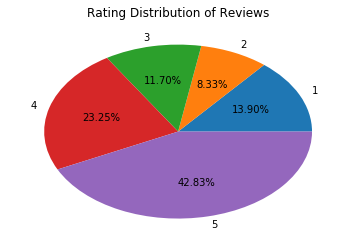

In [55]:
import matplotlib.pyplot as plt
labels = ['1', '2', '3', '4','5']
t=review_reviewer_50000.groupby(['stars'])
plt.pie(t.size(),labels=labels,autopct='%1.2f%%')
plt.title("Rating Distribution of Reviews")
plt.show()

**Below part is mainly for vis proj, not related to ML proj**

In [5]:
review_cat_user_userFea_ucFea_businessloc_text_100=pd.read_csv('review_cat_user_userFea_ucFea_businessloc_text_100.csv',encoding='gb2312')
del review_cat_user_userFea_ucFea_businessloc_text_100['Unnamed: 0']
review_cat_user_userFea_ucFea_businessloc_text_100

,review_id,text,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,...,uc_avg_stars,uc_avg_review_useful,uc_avg_review_funny,uc_avg_review_cool,city,state,postal_code,latitude,longitude,business_avg_stars
0,-8Ec71BpqD6R74VNB84u7Q,"They were very helpful, and hands on, still go...",--104qdWvE99vaoIsj9ZJQ,3,2016-04-26,0,0,2,0,2.33,...,5.000000,0.000000,0.000000,0.000000,North Las Vegas,NV,89081,36.2668,-115.1160,2.5
1,-8Ec71BpqD6R74VNB84u7Q,"They were very helpful, and hands on, still go...",--104qdWvE99vaoIsj9ZJQ,3,2016-04-26,0,0,2,0,2.33,...,5.000000,0.000000,0.000000,0.000000,North Las Vegas,NV,89081,36.2668,-115.1160,2.5
2,-8Ec71BpqD6R74VNB84u7Q,"They were very helpful, and hands on, still go...",--104qdWvE99vaoIsj9ZJQ,3,2016-04-26,0,0,2,0,2.33,...,5.000000,0.000000,0.000000,0.000000,North Las Vegas,NV,89081,36.2668,-115.1160,2.5
3,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.300000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
4,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.250000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
5,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.250000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
6,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.000000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
7,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.000000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
8,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.000000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0
9,-CUbqcEr5aaaGNzIOZilcg,"For a small casino, this Horseshoe is pretty n...",--amZ_cR9Zgu4B1RrAHJyA,11,2015-11-04,0,0,0,0,4.25,...,4.000000,0.000000,0.000000,0.000000,Cleveland,OH,44113,41.4979,-81.6925,3.0


In [128]:
conn = pymysql.connect(host='192.168.1.131',user='yichen', password='0000', database='yelp_db', charset='utf8')
cur = conn.cursor()
cur.execute('select id as business_id,city,state,latitude,longitude,stars as business_avg_stars from business')
t=cur.fetchall()
#user_info_50000=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
buiness_loc_star=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
print('done')
#review_cat_user_userFea_ucFea_businessloc_text_friend_100=pd.merge(friendcount,review_cat_user_userFea_ucFea_businessloc_text_100,how='inner',on='user_id')
#review_cat_user_userFea_ucFea_businessloc_text_friend_100.to_csv('review_cat_user_userFea_ucFea_businessloc_text_friend_100.csv')

done


In [80]:
#review_cat_user_userFea_ucFea_businessloc_text_friend_100=pd.merge(friendcount,review_cat_user_userFea_ucFea_businessloc_text_100,how='right',on='user_id')
#friendcount.to_csv('E:/DATA/DATA in CU Boulder/CSCI 5622/friendcount.csv')
#review_cat_user_userFea_ucFea_businessloc_text_friend_100=pd.merge(friendcount,review_cat_user_userFea_ucFea_businessloc_text_100,how='right',on='user_id')
review_cat_user_userFea_ucFea_businessloc_text_friend_100.to_csv('user100.csv',encoding='gb2312')

In [44]:
text_businessloc_100user=review_user_businessloc_text_friend_100[['user_id','review_id','business_id','text','city','state','postal_code','latitude','longitude','business_avg_stars']]
#del review_user_businessloc_text_friend_100['uc_review_count']#,'','uc_avg_review_funny','uc_avg_review_cool'

In [102]:
#user=text_businessloc_100user['user_id'].drop_duplicates()
#text_businessloc_100user
#pd.merge(user100,text_businessloc_100user,on='user_id',how='inner')
#t=friendcount[friendcount['friendcount']>6000]
query="select user_id,friend_id from friend where user_id='1vXJWH7L0IMEz5-8aU3SOA' or  user_id='3zxy3LVBV3ttxoYbY4rQ8A' or  user_id='4Y81J2Tdq5XAnkeYmCZ2ow' or  user_id='5MCBLBxr10NLUKZ4AboAMg' or  user_id='6tbXpUIU6upoeqWNDo9k_A' or  user_id='9HGR8sU_zm15sI109H-SGQ' or  user_id='AHRrG3T1gJpHvtpZ-K0G_g' or  user_id='aKN3Fq2uaRJTwZRPlI5GcQ' or  user_id='c-Dja5bexzEWBufNsHfRrQ' or  user_id='dIIKEfOgo0KqUfGQvGikPg' or  user_id='djxnI8Ux8ZYQJhiOQkrRhA' or  user_id='fgwI3rYHOv1ipfVfCSx7pg' or  user_id='F_5_UNX-wrAFCXuAkBZRDw' or  user_id='hizGc5W1tBHPghM5YKCAtg' or  user_id='iLjMdZi0Tm7DQxX1C1_2dg' or  user_id='IU86PZPgTDCFwJEuAg2j7g' or  user_id='MeDuKsZcnI3IU2g7OlV-hQ' or  user_id='MGPQVLsODMm9ZtYQW-g_OA' or  user_id='mV4lknblF-zOKSF8nlGqDA' or  user_id='nkN_do3fJ9xekchVC-v68A' or  user_id='o5STsEtfvD1Ig0J7Z-1uxA' or  user_id='Oi1qbcz2m2SnwUeztGYcnQ' or  user_id='ottOuy7FZtUV2HnBfhVk0w' or  user_id='peuxbSQwXed-81cSqL7Ykw' or  user_id='qVc8ODYU5SZjKXVBgXdI7w' or  user_id='Sv3Q-VQ4jBi1KPpdnKztAg' or  user_id='UsXqCXRZwSCSw0AT7y1uBg' or  user_id='UUqGHQFu2tQDGv5r3yJWPA' or  user_id='Ve0LUwcrzxL7w0RYgY4Aaw' or  user_id='VHdY6oG2JPVNjihWhOooAQ' or  user_id='wEE-YMx5pmSuagLtNxMPKA' or  user_id='xsT4KZTu_KnOVavtuXn4RA' or  user_id='yLW8OrR8Ns4X1oXJmkKYgg' or  user_id='YttDgOC9AlM4HcAlDsbB2A' or  user_id='ZIOCmdFaMIF56FR-nWr_2A' "
cur.execute(query)
tt=cur.fetchall()
user_6000friends=pd.DataFrame(list(tt), columns = [i[0] for i in cur.description])

In [152]:
#review_info_notext.rename(columns={'user_id':'friend_id'}, inplace=True))
#user_6000friends_review=pd.merge(review_info_notext,user_6000friends,how='inner',on='friend_id')
#user_6000friends_reviewstardate=user_6000friends_review.groupby(['user_id','friend_id','business_id','review_id','date'])['stars'].mean().reset_index()
#user_6000friends_reviewstardate_businesslocstar=pd.merge(user_6000friends_reviewstardate,buiness_loc_star,how='inner',on='business_id')

ttt=user_6000friends_reviewstardate_businesslocstar.loc[user_6000friends_reviewstardate_businesslocstar['popularuser_id']=='3zxy3LVBV3ttxoYbY4rQ8A']
#ttt.to_csv('user_6000friends_reviewstardate_businesslocstar.csv')

#user_6000friends_reviewstardate_businesslocstar.to_csv('E:/DATA/DATA in CU Boulder/CSCI 5622/user_6000friends_reviewstardate_businesslocstar.csv')

In [171]:
#ttt1=ttt[['friend_id']].copy()
#ttt1.rename(columns={'friend_id':'user_id'}, inplace=True)
#tttt=pd.merge(ttt1,friendcount,on='user_id',how='inner')
#ttt1=ttt1.drop_duplicates()
#friends40=tttt[0:40]

conn = pymysql.connect(host='192.168.1.131',user='yichen', password='0000', database='yelp_db', charset='utf8')
cur = conn.cursor()
cur.execute(" select user_id,friend_id from friend where user_id='PcvbBOCOcs6_suRDH7TSTg' or user_id='RBZ_kMjowV0t6_nv2UKaDQ' or user_id='uZ4z-4ftg7LbGR_blmZTow' or user_id='1luEnCV7VID3pgPsgqd2KQ' or user_id='PeLGa5vUR8_mcsn-fn42Jg' or user_id='SB3ti6pzJ3qHfBCk5_pUSA' or user_id='-24B_nkBG6Et1_QJecnN2A' or user_id='-EJorVxe7h2GSxdiRyMmDA' or user_id='2s27wyX1hn2lL1jv5Sn36w' or user_id='3HSmHE-FQZ7b2kyfa1e64A' or user_id='3Vd_ATdvvuVVgn_YCpz8fw' or user_id='62GNFh5FySkA3MbrQmnqvg' or user_id='8BTQuNFSbfycwMbKTO7tsQ' or user_id='9xMZCKH77Kbzu1iyZuJFfg' or user_id='B8D9WyakYaObjA2icM7GGw' or user_id='FZTkBavnUWVQRK3ULOxePQ' or user_id='FxBfuhlJuEljR37RpuDhjA' or user_id='MpzXdrXWM3PpWY46WZQeag' or user_id='N0vGKlgjT62Dz1DpXunSKQ' or user_id='N8j2-22fGnRFDXGo16pNwQ' or user_id='PRIiGqJFSx1G8rXPr8sryg' or user_id='TltQV9q7nsk0Na_PsJGfLg' or user_id='U4INQZOPSUaj8hMjLlZ3KA' or user_id='USZx-55MA2-lG2hBu6PWJA' or user_id='UfmxjtmLhdX5XIuVkkbdGg' or user_id='WWWujmZ95y0a2RR5_kQ9sw' or user_id='d53XPbuax-aS7MuH29zIGQ' or user_id='dipVxaat-2-XN3OHWcZjmg' or user_id='fGHHZqPfT6CSWr17QK5x7g' or user_id='qewG3X2O4X6JKskxyyqFwQ' or user_id='uEvusDwoSymbJJ0auR3muQ' or user_id='ycVIThPWpZa2TfTlonf4fQ' or user_id='ysCBsXWPB-LAiewVS3jZfQ' or user_id='8SgjU2fID9VqKQooFt1DIQ' or user_id='HYQoxBC1y1DGPq6pGP09Tw' or user_id='e6iCOIhtupBCiw-VwBvJ4A' or user_id='cjotiAHFSbFuvbxTWmGi1Q' or user_id='4PjAGec-mSiEm-jxk6dISg' or user_id='66MuIO4CosmulHv2sig9Wg' or user_id='CBG3um4DlmwtSphCo5ENBg' ")
t=cur.fetchall()
#user_info_50000=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
friends40user=pd.DataFrame(list(t), columns = [i[0] for i in cur.description])
print('done')

done
